In [1]:
%%capture
%pip install -U 'rockfish[labs]' -f 'https://docs142.rockfish.ai/packages/index.html'

In [2]:
import rockfish as rf
import rockfish.labs as rl

## Preprocessing Examples
### Example 1. Downsampling a tabular dataset

Randomly select 10 records

In [3]:
# download our example of tabular data: fall_detection.csv
!wget --no-clobber https://docs142.rockfish.ai/tutorials/fall_detection.csv
# original source data
og_tab_dataset = rf.Dataset.from_csv("tabular", "fall_detection.csv")
og_tab_dataset.to_pandas()

File ‘fall_detection.csv’ already there; not retrieving.



Age range of patient Sex  \
0                   60<70   M   
1                   30<40   F   
2                   60<70   M   
3                   80<90   M   
4                   60<70   M   
...                   ...  ..   
2577                50<60   M   
2578                80<90   F   
2579                30<40   F   
2580                60<70   M   
2581                50<60   F   

     Involvement of medication associated with fall risk  \
0                                                   Yes    
1                                                   Yes    
2                                                   Yes    
3                                                   Yes    
4                                                   Yes    
...                                                 ...    
2577                                                 No    
2578                                                 No    
2579                                                 No    
2580                                                 No    
2581                                                Yes    

     Whether a fall prevention protocol was implemented Reason for incident  \
0                                                   Yes                Slip   
1                                                   Yes     Loss of balance   
2                                                   Yes    Mental confusion   
3                                                   Yes    Mental confusion   
4                                                   Yes     Loss of balance   
...                                                 ...                 ...   
2577                                                 No     Muscle weakness   
2578                                                 No         Hypotension   
2579                                                 No     Muscle weakness   
2580                                                Yes     Loss of balance   
2581                                                 No     Muscle weakness   

     Whether a restraint prescription was given  \
0                                            No   
1                                            No   
2                                            No   
3                                            No   
4                                            No   
...                                         ...   
2577                                         No   
2578                                         No   
2579                                         No   
2580                                         No   
2581                                         No   

     Whether a physical therapy prescription was given  BBS Score  \
0                                                  Yes         41   
1                                                   No         41   
2                                                  Yes         43   
3                                                  Yes         40   
4                                                  Yes         40   
...                                                ...        ...   
2577                                                No         44   
2578                                                No         43   
2579                                                No         43   
2580                                                No         44   
2581                                                No         44   

      Body Temperature  Heart Rate  ...  Chronic Heart Failure  Stroke  \
0                   97          80  ...                     No      No   
1                   96          78  ...                     No      No   
2                   98          81  ...                     No      No   
3                   99          82  ...                     No      No   
4                   96          90  ...                     No      No   
...                ...         ...  ...             

In [4]:
# downsampling: 10 random rows
query = """SELECT *
    FROM my_table
    ORDER BY RANDOM()
    LIMIT 10
    """
dataset = og_tab_dataset.sync_sql(query) 
dataset.to_pandas()

Age range of patient Sex  \
0                60<70   F   
1                70<80   M   
2                70<80   F   
3                30<40   F   
4                70<80   M   
5                70<80   M   
6                80<90   M   
7                60<70   F   
8                30<40   F   
9                60<70   F   

  Involvement of medication associated with fall risk  \
0                                                 No    
1                                                Yes    
2                                                 No    
3                                                Yes    
4                                                 No    
5                                                 No    
6                                                 No    
7                                                 No    
8                                                Yes    
9                                                Yes    

  Whether a fall prevention protocol was implemented Reason for incident  \
0                                                Yes     Muscle weakness   
1                                                Yes    Mental confusion   
2                                                Yes                Slip   
3                                                Yes     Muscle weakness   
4                                                Yes    Mental confusion   
5                                                Yes                Slip   
6                                                Yes     Loss of balance   
7                                                 No     Loss of balance   
8                                                Yes    Mental confusion   
9                                                Yes     Loss of balance   

  Whether a restraint prescription was given  \
0                                         No   
1                                         No   
2                                         No   
3                                         No   
4                                         No   
5                                         No   
6                                         No   
7                                         No   
8                                         No   
9                                         No   

  Whether a physical therapy prescription was given  BBS Score  \
0                                                No         38   
1                                               Yes         38   
2                                                No         44   
3                                               Yes         41   
4                                               Yes         38   
5                                                No         41   
6                                                No         39   
7                                                No         48   
8                                                No         45   
9                                                No         38   

   Body Temperature  Heart Rate  ...  Chronic Heart Failure  Stroke  \
0                97          76  ...                     No      No   
1                96          95  ...                     No      No   
2                97          99  ...                     No      No   
3                98          76  ...                     No      No   
4                98          72  ...                     No      No   
5                98          87  ...                     No      No   
6                97          76  ...                     No      No   
7                97          73  ...                     No      No   
8                96         103  ...                     No      No   
9                95          87  ...                     No      No   

   Frozen shoulder  Osteoarthritis of hip Cerebellar Ataxia Hemiparesis  \
0               No                     No                No          No   
1               No

### Example 2. Downsampling the timeseries dataset

Randomly select 10 sessions. For finance dataset, the metadata fields are `customer`, `age`, `gender`.

In [5]:
# download our example of timeseries data: finance.csv
!wget --no-clobber https://docs142.rockfish.ai/tutorials/finance.csv
# original source data
og_ts_dataset = rf.Dataset.from_csv("timeseries", "finance.csv")
og_ts_dataset.to_pandas()

File ‘finance.csv’ already there; not retrieving.



customer age gender     merchant           category  amount  fraud  \
0      C1093826151   4      M   M348934600     transportation    4.55      0   
1       C575345520   2      F   M348934600     transportation   76.67      0   
2      C1787537369   2      M  M1823072687     transportation   48.02      0   
3      C1732307957   5      F   M348934600     transportation   55.06      0   
4       C842799656   1      F   M348934600     transportation   25.62      0   
...            ...  ..    ...          ...                ...     ...    ...   
49995  C1971105040   3      M   M348934600     transportation   67.91      0   
49996    C51444479   3      M   M348934600     transportation   32.27      0   
49997  C1096642744   5      M  M1535107174  wellnessandbeauty  149.70      0   
49998  C1166683343   2      F  M1823072687     transportation   24.78      0   
49999   C344209010   5      F   M348934600     transportation   19.80      0   

       timestamp  
0     2023-01-01  
1     2023-01-01  
2     2023-01-01  
3     2023-01-01  
4     2023-01-01  
...          ...  
49995 2023-01-20  
49996 2023-01-20  
49997 2023-01-20  
49998 2023-01-20  
49999 2023-01-20  

[50000 rows x 8 columns]

In [6]:
# downsampling.: 10 random sessions
query = """SELECT my_table.*
    FROM my_table
    JOIN (
        SELECT DISTINCT customer, age, gender
        FROM my_table
        ORDER BY RANDOM()
        LIMIT 10
    ) select_sessions
    ON my_table.customer = select_sessions.customer
    AND my_table.age = select_sessions.age
    AND my_table.gender = select_sessions.gender
"""
dataset = og_ts_dataset.sync_sql(query) 
dataset.to_pandas()

customer age gender     merchant            category  amount  fraud  \
0    C1826105311   3      F   M348934600      transportation   22.72      0   
1    C1826105311   3      F   M348934600      transportation   46.49      0   
2    C1826105311   3      F   M348934600      transportation   10.11      0   
3    C1826105311   3      F   M151143676  barsandrestaurants   46.42      0   
4    C1826105311   3      F   M348934600      transportation   40.80      0   
..           ...  ..    ...          ...                 ...     ...    ...   
127  C1163804561   5      F  M1535107174   wellnessandbeauty   77.49      0   
128   C539791425   4      F  M1053599405              health   45.79      0   
129   C539791425   4      F  M1823072687      transportation   11.06      0   
130   C539791425   4      F  M1823072687      transportation   19.58      0   
131   C539791425   4      F    M85975013                food   22.76      0   

     timestamp  
0   2023-01-19  
1   2023-01-20  
2   2023-01-08  
3   2023-01-09  
4   2023-01-11  
..         ...  
127 2023-01-03  
128 2023-01-03  
129 2023-01-04  
130 2023-01-05  
131 2023-01-06  

[132 rows x 8 columns]

## Evaluation examples
### Example of visualization on the conditional dataset(s)

visualize the finance dataset when `age` is in the group of "1", "2" or "3"

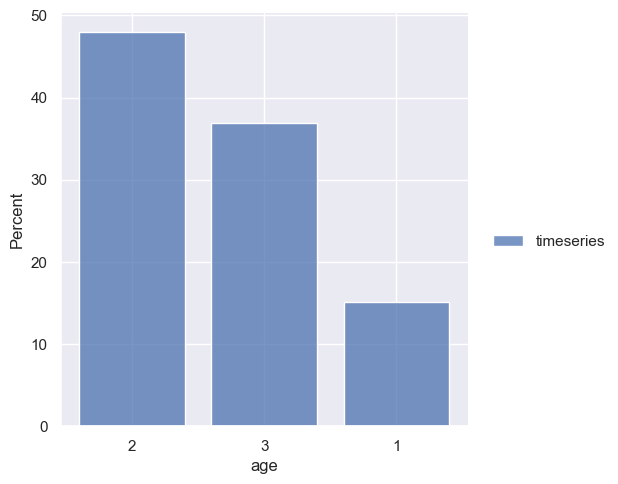

In [7]:
query = """SELECT *
    FROM my_table
    WHERE age IN ('1', '2', '3')"""

# Argument of datasets should be a list of one or more datasets
rl.vis.custom_plot([og_ts_dataset], query, rl.vis.plot_bar, "age");

### Example of visualization on the aggregated dataset(s)

Count the number of unique values per sessions for high cardinality field. 

Below is the example on the finance dataset.

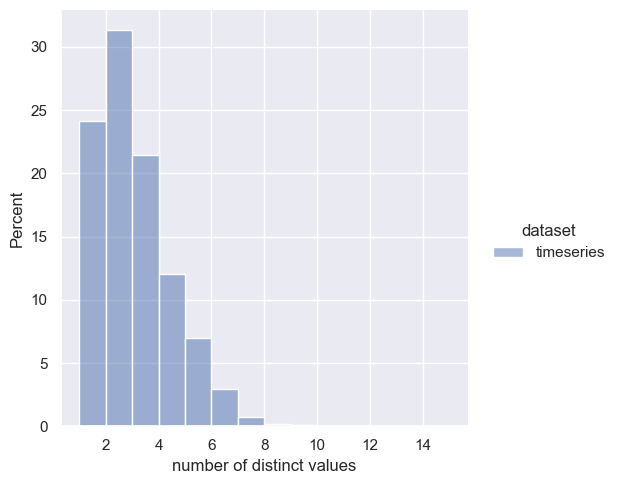

In [8]:
query = """SELECT COUNT(DISTINCT merchant) AS "number of distinct values"
    FROM my_table
    GROUP BY customer, age, gender"""

# Argument of datasets should be a list of one or more datasets
rl.vis.custom_plot([og_ts_dataset], query, rl.vis.plot_hist, "number of distinct values", binwidth = 1);